In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/college-salaries/salaries-by-region.csv
/kaggle/input/college-salaries/salaries-by-college-type.csv
/kaggle/input/college-salaries/degrees-that-pay-back.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("/kaggle/input/college-salaries/salaries-by-region.csv")
data.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   School Name                        320 non-null    object
 1   Region                             320 non-null    object
 2   Starting Median Salary             320 non-null    object
 3   Mid-Career Median Salary           320 non-null    object
 4   Mid-Career 10th Percentile Salary  273 non-null    object
 5   Mid-Career 25th Percentile Salary  320 non-null    object
 6   Mid-Career 75th Percentile Salary  320 non-null    object
 7   Mid-Career 90th Percentile Salary  273 non-null    object
dtypes: object(8)
memory usage: 20.1+ KB


In [5]:
data.describe()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
count,320,320,320,320,273,320,320,273
unique,320,5,168,204,166,217,130,115
top,Stanford University,Northeastern,"$42,600.00","$72,100.00","$43,300.00","$60,700.00","$117,000.00","$150,000.00"
freq,1,100,6,5,5,5,10,10


In [6]:
data.isnull().sum()

School Name                           0
Region                                0
Starting Median Salary                0
Mid-Career Median Salary              0
Mid-Career 10th Percentile Salary    47
Mid-Career 25th Percentile Salary     0
Mid-Career 75th Percentile Salary     0
Mid-Career 90th Percentile Salary    47
dtype: int64

In [7]:
data.shape

(320, 8)

In [8]:
colsToClean = ['Starting Median Salary',
       'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary',
       'Mid-Career 25th Percentile Salary',
       'Mid-Career 75th Percentile Salary',
       'Mid-Career 90th Percentile Salary']

for col in colsToClean:
    data[col] = data[col].str.replace("$","").str.replace(",","")
    data[col] = pd.to_numeric(data[col])

In [9]:
data.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0
1,California Institute of Technology (CIT),California,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,California,71800.0,122000.0,NaN,96000.0,180000.0,NaN
3,"University of California, Berkeley",California,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0
4,Occidental College,California,51900.0,105000.0,NaN,54800.0,157000.0,NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   School Name                        320 non-null    object 
 1   Region                             320 non-null    object 
 2   Starting Median Salary             320 non-null    float64
 3   Mid-Career Median Salary           320 non-null    float64
 4   Mid-Career 10th Percentile Salary  273 non-null    float64
 5   Mid-Career 25th Percentile Salary  320 non-null    float64
 6   Mid-Career 75th Percentile Salary  320 non-null    float64
 7   Mid-Career 90th Percentile Salary  273 non-null    float64
dtypes: float64(6), object(2)
memory usage: 20.1+ KB


In [11]:
data['Mid-Career 10th Percentile Salary'] = data['Mid-Career 10th Percentile Salary'].fillna(
    data['Mid-Career 10th Percentile Salary'].median()
)

data['Mid-Career 90th Percentile Salary'] = data['Mid-Career 90th Percentile Salary'].fillna(
    data['Mid-Career 90th Percentile Salary'].median()
)


In [12]:
data.isnull().sum()

School Name                          0
Region                               0
Starting Median Salary               0
Mid-Career Median Salary             0
Mid-Career 10th Percentile Salary    0
Mid-Career 25th Percentile Salary    0
Mid-Career 75th Percentile Salary    0
Mid-Career 90th Percentile Salary    0
dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Region_Encoded'] = le.fit_transform(data['Region'])

data2 = data.drop(['School Name', 'Region'], axis=1)

In [14]:
data2.head()

,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,Region_Encoded
0,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0,0
1,75500.0,123000.0,43700.0,104000.0,161000.0,154000.0,0
2,71800.0,122000.0,43700.0,96000.0,180000.0,154000.0,0
3,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0,0
4,51900.0,105000.0,43700.0,54800.0,157000.0,154000.0,0


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = data2.drop("Region_Encoded", axis=1).columns
data2[numerical_cols] = scaler.fit_transform(data2[numerical_cols])

In [16]:
data2.head()

,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,Region_Encoded
0,3.654865,2.971160,2.953752,2.760530,2.804850,2.868494,0
1,4.426810,2.575582,-0.167432,3.686771,1.849168,-0.161686,0
2,3.866771,2.509652,-0.167432,3.006961,2.638644,-0.161686,0
3,2.065567,1.850356,1.829115,1.732319,1.350551,1.221017,0
4,0.854673,1.388849,-0.167432,-0.494057,1.682962,-0.161686,0


In [17]:
Q1 = data2[numerical_cols].quantile(0.25)
Q3 = data2[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((data2[numerical_cols] < (Q1 - 1.5 * IQR)) | (data2[numerical_cols] > (Q3 + 1.5 * IQR)))
outliers.sum().sort_values(ascending=False)

Mid-Career 10th Percentile Salary    21
Mid-Career 90th Percentile Salary    18
Starting Median Salary               17
Mid-Career 25th Percentile Salary    14
Mid-Career 75th Percentile Salary    10
Mid-Career Median Salary              8
dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


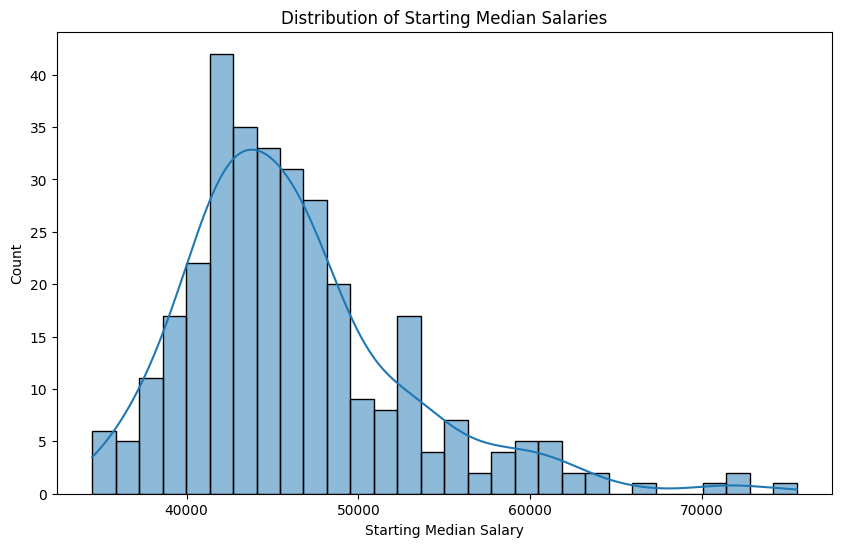

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Starting Median Salary'], bins=30, kde=True)
plt.title("Distribution of Starting Median Salaries")
plt.xlabel("Starting Median Salary")
plt.ylabel("Count")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


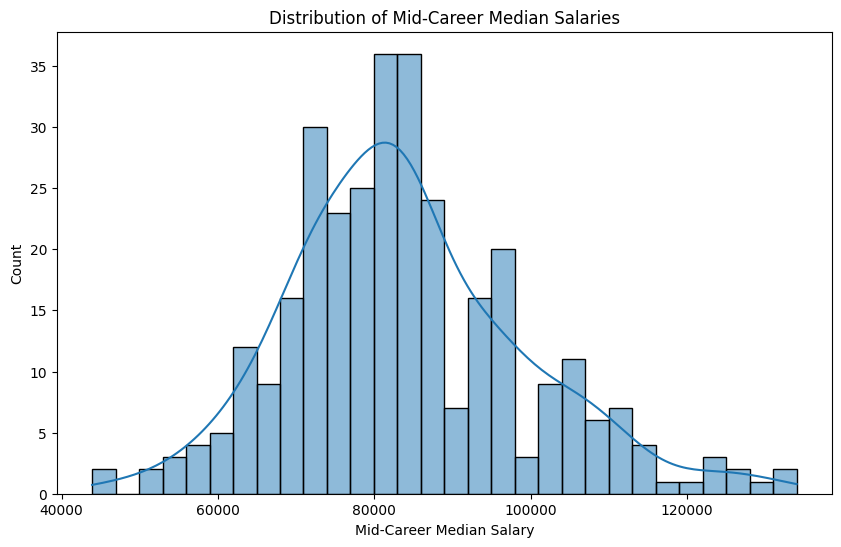

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Mid-Career Median Salary'], bins=30, kde=True)
plt.title("Distribution of Mid-Career Median Salaries")
plt.xlabel("Mid-Career Median Salary")
plt.ylabel("Count")
plt.show()

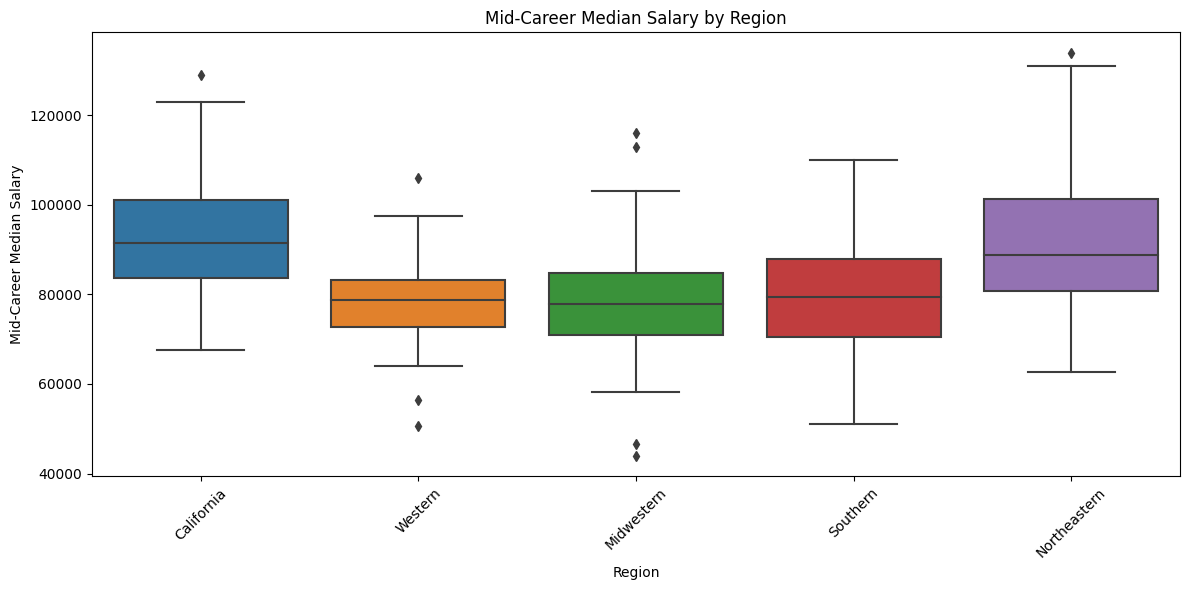

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Mid-Career Median Salary', data=data)
plt.title("Mid-Career Median Salary by Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

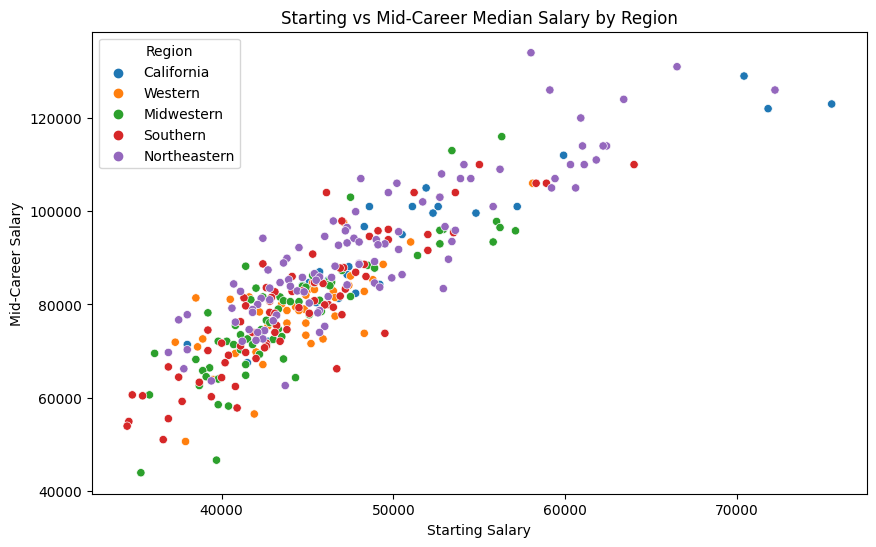

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Starting Median Salary', y='Mid-Career Median Salary', hue='Region', data=data)
plt.title("Starting vs Mid-Career Median Salary by Region")
plt.xlabel("Starting Salary")
plt.ylabel("Mid-Career Salary")
plt.show()

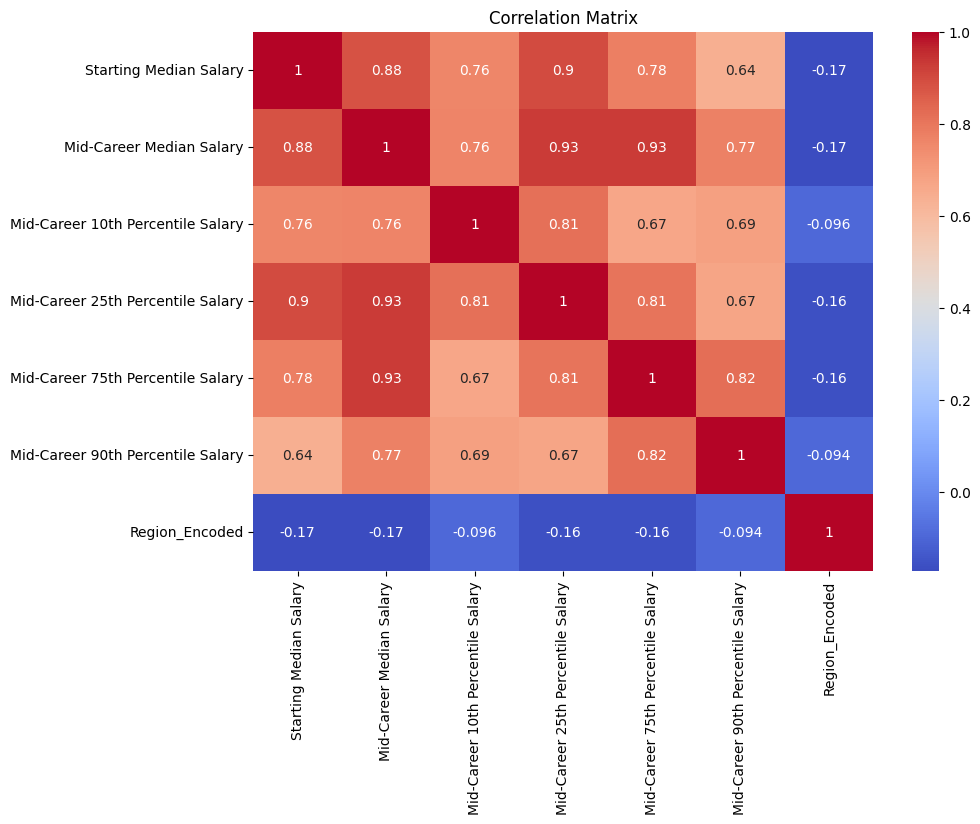

In [22]:
plt.figure(figsize=(10, 7))
sns.heatmap(data2.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

X = data2.drop("Mid-Career Median Salary", axis=1)
y = data2["Mid-Career Median Salary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 0.055431257926866394
R² Score: 0.9436732686594493


In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV R² Score:", grid.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}
Best CV R² Score: 0.9362943604354224
